In [146]:
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install Pillow

You are using pip version 19.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [478]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt

First thing first is to inspect the data, see what it looks like. I don't care about where the data is right now, just want to see it. We will worry about the data layout and creating images from that stuff later.

In [448]:
data_path = './data/a05/p4/s13.txt'
feature_labels = [
    'T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 'T_xmag', 'T_ymag', 'T_zmag',
    'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag',
    'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag',
    'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag',
    'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag'
]
predicted_labels_map = {
    'a01': 'sitting',
    'a02': 'standing',
    'a03': 'lying on back',
    'a04': 'lying on right side',
    'a05': 'ascending stairs',
    'a06': 'descending stairs',
    'a07': 'standing in an elevator',
    'a08': 'moving in elevator',
    'a09': 'walking in lot',
    'a10': 'walking on flat treadmill',
    'a11': 'walking on inclined treadmill',
    'a12': 'running on flat treadmill',
    'a13': 'exercising on stepper',
    'a14': 'exercising on cross-trainer',
    'a15': 'cycling horizontally',
    'a16': 'cycling vertically',
    'a17': 'rowing',
    'a18': 'jumping',
    'a19': 'playing basketball'
}


In [337]:
s01 = pd.read_csv(data_path, names=feature_labels)

In [338]:
s01

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,8.4187,-2.9418,-0.71775,0.56766,-0.322300,0.23219,-0.40913,0.75279,-0.14550,7.5645,...,0.66231,-9.6831,-2.78570,-0.69716,0.168380,-0.448640,-0.98857,0.71204,0.12749,-0.39615
1,9.1549,-3.4651,-1.02150,0.73916,-0.329940,0.14312,-0.40675,0.75214,-0.16103,8.0512,...,0.65778,-9.6455,-1.97430,-2.11340,0.274910,-0.650400,-1.41350,0.69181,0.15547,-0.41438
2,9.3595,-3.9881,-0.30709,0.90964,-0.202520,0.23040,-0.40421,0.74825,-0.18093,8.9887,...,0.65540,-13.2490,-3.68150,-0.37143,-0.227560,-0.373170,-1.48290,0.66976,0.19944,-0.42613
3,9.2703,-3.5898,0.29914,0.88462,-0.083243,0.27913,-0.39725,0.74521,-0.20534,9.4369,...,0.65103,-12.0920,-0.47848,-1.55320,-0.312790,0.303160,-0.80772,0.66024,0.23791,-0.41890
4,8.9823,-2.8478,0.59274,0.83263,-0.031932,0.19404,-0.39188,0.74193,-0.22968,9.0361,...,0.64849,-11.2660,0.70491,-1.45390,-0.586920,-0.460570,-0.93196,0.64543,0.26886,-0.41837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,8.8629,-1.4224,2.36420,0.41537,0.081614,-0.14620,-0.46795,0.62400,-0.38273,8.0261,...,0.62717,-9.6518,-4.36320,-2.12360,0.061775,0.126870,-1.14560,0.42494,0.31476,-0.39521
121,8.9498,-1.4363,2.49970,0.35515,0.055375,-0.20641,-0.45027,0.59959,-0.37056,8.0355,...,0.61894,-8.9497,-4.31610,-1.26900,-0.031969,-0.318200,-1.53560,0.45549,0.37219,-0.41468
122,9.1477,-1.3718,2.51850,0.36535,0.115270,-0.21375,-0.42350,0.59503,-0.36738,8.0262,...,0.62798,-9.0975,-3.31110,-1.49720,0.863180,0.015088,-1.69230,0.47812,0.40275,-0.40037
123,9.8163,-1.4013,2.07830,0.35772,0.112150,-0.25520,-0.42290,0.59802,-0.34314,7.9103,...,0.63063,-9.4699,-14.80200,-2.14840,0.555650,-0.010419,-1.80460,0.51702,0.44352,-0.41292


Data frame looks as we expect it to. Some summary statistics to get a feel for the data

In [213]:
s01.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,7.975714,1.083150,5.606846,0.004897,0.026123,-0.003726,-0.790726,-0.068490,0.135897,0.679134,...,-0.035894,-2.814833,-9.085131,2.618207,-0.005036,0.002166,-0.003155,0.739615,0.301314,-0.057119
std,0.119981,0.046987,0.181035,0.015592,0.036279,0.007920,0.002870,0.001751,0.015907,0.039324,...,0.001074,0.019892,0.013178,0.018793,0.007633,0.007310,0.007074,0.000850,0.000792,0.000823
min,7.682300,0.997440,5.316900,-0.039399,-0.080639,-0.030754,-0.795540,-0.071582,0.109560,0.585420,...,-0.039347,-2.867500,-9.112400,2.571100,-0.024685,-0.019207,-0.021531,0.737520,0.299680,-0.059241
25%,7.876300,1.035000,5.436400,-0.005710,0.010725,-0.008867,-0.793210,-0.069849,0.119820,0.649210,...,-0.036599,-2.822500,-9.089400,2.608400,-0.009489,-0.003025,-0.007918,0.739000,0.300710,-0.057598
50%,7.958700,1.080700,5.608100,0.005122,0.023588,-0.003457,-0.791610,-0.068773,0.135040,0.688700,...,-0.035765,-2.815000,-9.088600,2.622000,-0.005644,0.001586,-0.002558,0.739550,0.301320,-0.057208
75%,8.108200,1.124000,5.749300,0.014090,0.043022,0.001953,-0.787430,-0.067195,0.155050,0.708470,...,-0.035240,-2.807500,-9.074500,2.625000,-0.000232,0.007598,0.001253,0.740240,0.301830,-0.056500
max,8.160500,1.183200,6.181400,0.045403,0.214760,0.015614,-0.785290,-0.064353,0.159160,0.759300,...,-0.033109,-2.747600,-9.044500,2.669600,0.015853,0.020288,0.013777,0.742380,0.303420,-0.054963


Expectations are that accelerations have larger numbers in general, but everything else is pretty small. The dataset will require normalization for proper image conversion. Lets graph some of the acceleration data, just for the T. 

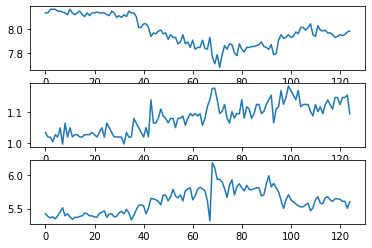

In [214]:
time = range(len(s01))
plt.subplot(3,1,1)
plt.plot(s01['T_xacc'])
plt.subplot(3,1,2)
plt.plot(s01['T_yacc'])
plt.subplot(3,1,3)
plt.plot(s01['T_zacc'])

Note the y axis is different, so on one graph this would look different, but the standard deviation is not too different, so the shapes look mostly the same (more action in the x and z axes than the y axis)

For now, let's branch off into just grabbing the acceleration stats. That's all I'm interested in right now. Later, if we want to use all the features, it should be trivial to account for the rest and produce image representations based on that, as long as our mapping is consistent

I use the simple strategy described in [this paper](https://www.researchgate.net/publication/259899616_Images_in_mind_-_Design_metaphor_and_method_to_classify_driver_distraction_in_critical_situations) to generate images from these variables. 
Steps necessary are

1. Normalize each feature BY SENSOR. If we normalize T_xacc separate from T_yacc, we lose the information that for some activity, there was a lot of acceleration in the x, but no y_acc. This occurs per sensor type because gyroscopes, accelerometers, and magnetometers operate in different units. This also needs to be done by aggregating the data across all segments, not just per segment, because then information loss occurs between different activities. 
2. Convert range of [0,1] to [0,255] for grayscale
3. Save images 

In [426]:
acceleration_data = s01.filter(regex='acc$', axis=1).values.flatten()
normalized = s01.filter(regex='acc$', axis=1).apply(lambda x: round(255 * (x - acceleration_data.min())/np.ptp(acceleration_data)))

In [427]:
normalized.describe()

,T_xacc,T_yacc,T_zacc,RA_xacc,RA_yacc,RA_zacc,LA_xacc,LA_yacc,LA_zacc,RL_xacc,RL_yacc,RL_zacc,LL_xacc,LL_yacc,LL_zacc
count,125.000000,125.00000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.00000,125.000000,125.00000
mean,226.496000,119.73600,152.040000,223.81600,174.304000,147.688000,221.168000,111.968000,168.496000,49.536000,154.79200,124.728000,52.48800,120.744000,128.28800
std,10.406747,8.38984,8.857656,11.49571,10.742758,6.709906,9.891945,6.823744,5.489909,14.438157,20.12433,7.262782,15.21439,22.519491,8.04104
min,212.000000,102.00000,130.000000,204.00000,145.000000,134.000000,209.000000,99.000000,157.000000,8.000000,115.00000,103.000000,13.00000,0.000000,112.00000
25%,218.000000,112.00000,146.000000,215.00000,169.000000,142.000000,213.000000,106.000000,165.000000,42.000000,143.00000,121.000000,46.00000,112.000000,124.00000
50%,225.000000,121.00000,154.000000,223.00000,176.000000,149.000000,220.000000,112.000000,169.000000,48.000000,152.00000,125.000000,50.00000,124.000000,128.00000
75%,231.000000,127.00000,159.000000,229.00000,182.000000,153.000000,226.000000,116.000000,172.000000,56.000000,162.00000,128.000000,58.00000,135.000000,132.00000
max,255.000000,132.00000,163.000000,254.00000,196.000000,160.000000,249.000000,131.000000,180.000000,80.000000,247.00000,140.000000,97.00000,153.000000,155.00000


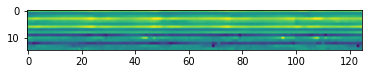

In [482]:
img_array = normalized.to_numpy().astype(np.uint8).T
im = Image.fromarray(img_array)
imshow(img_array)
im.save('a01p1s01.png')

In [483]:
stats = {'acc': {}, 'gyro': {}, 'mag': {}}

In [484]:
def update_stats(df):
    acc_data = df.filter(regex='acc$', axis=1).values.flatten()
    stats['acc']['min'] = acc_data.min()
    stats['acc']['max'] = acc_data.max()
    gyro_data = df.filter(regex='gyro$', axis=1).values.flatten()
    stats['gyro']['min'] = gyro_data.min()
    stats['gyro']['max'] = gyro_data.max()
    mag_data = df.filter(regex='mag$', axis=1).values.flatten()
    stats['mag']['min'] = mag_data.min()
    stats['mag']['max'] = mag_data.max()


def get_normalization_stats(path):
    for dirName, subDirs, fileList in os.walk(path):
        if('s01.txt' in fileList):
            for file in fileList:
                df = read_data(os.path.join(dirName,file))
                update_stats(df)
    stats['acc']['ptp'] = stats['acc']['max'] - stats['acc']['min']
    stats['gyro']['ptp'] = stats['gyro']['max'] - stats['gyro']['min']
    stats['mag']['ptp'] = stats['gyro']['max'] - stats['gyro']['min']
            
def create_images(data_path, save_path):
    for dirName, subDirs, fileList in os.walk(data_path):
        if('s01.txt' in fileList):
            for file in fileList:
                df = create_normalized_df(os.path.join(dirName,file))
                # Only care about acc right now.
                df = df.filter(regex='acc$', axis=1)
                save_image(df, os.path.join(dirName,file), save_path)
                
            
def save_image(df, original_path, save_path):
    img_array = df.to_numpy().astype(np.uint8).T
    im = Image.fromarray(img_array)
    image_name = create_image_name(original_path)
    im.save(os.path.join(save_path,image_name))
    
def create_image_name(original_path):
    unlabeled_data = original_path.split('/')[2:]
    unlabeled_data[0] = predicted_labels_map[unlabeled_data[0]].replace(' ', '_')
    return'_'.join(unlabeled_data).replace('.txt', '.png')

            
def read_data(path):
    return pd.read_csv(path, names=feature_labels)
    
    
def create_normalized_df(path):
        ## TODO reject column_regex if it is not one of
        # acc$, gyro$, mag$, reject
        df = read_data(path)
        #column_key = regex[:len(regex)-1]
        acc_df = df.filter(regex='acc$', axis=1).apply(lambda x: round(255 * (x - stats['acc']['min'])/stats['acc']['ptp']))
        gyro_df = df.filter(regex='gyro$', axis=1).apply(lambda x: round(255 * (x - stats['gyro']['min'])/stats['gyro']['ptp']))
        mag_df = df.filter(regex='mag$', axis=1).apply(lambda x: round(255 * (x - stats['mag']['min'])/stats['mag']['ptp']))
        
        return acc_df.join(gyro_df).join(mag_df)
          

In [470]:
data_path = './data'
save_path = './images'
get_normalization_stats(data_path)

stats

{'acc': {'min': -64.74, 'max': 59.012, 'ptp': 123.752},
 'gyro': {'min': -7.1976, 'max': 4.7326, 'ptp': 11.9302},
 'mag': {'min': -1.0226, 'max': 1.2094, 'ptp': 11.9302}}

We can see that the stats have been populated. With them, we'll normalized each segement of data and create an image for it.

In [474]:
create_images(data_path, save_path)